In [182]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

from config import api_key
from citipy import citipy

%matplotlib inline


url = 'http://api.openweathermap.org/data/2.5/weather?'



In [217]:
# openweather api check

city = 'Chicago'

query_url = url + "q=" + city + '&APPID=' + api_key

weather_response = requests.get(query_url).json()
weather_response

# city = weather_response['name']
# humidity = weather_response['main']['humidity']
# humidity

lat = weather_response['coord']['lat']
lat


41.88

In [184]:
# Make random cities list using citypy

lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
print(len(cities))


609


In [185]:
# Generate weather data from openweathermap api using random cities list

city_list = []
country = []
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date_time = []

for city in cities:
    query_url = url + "q=" + city + '&units=imperial' + '&APPID=' + api_key
    weather = requests.get(query_url).json()
    try:
        city_list.append(weather['name'])
        country.append(weather['sys']['country'])
        lat.append(weather['coord']['lat'])
        temp.append(weather['main']['temp'])
        humidity.append(weather['main']['humidity'])
        cloudiness.append(weather['clouds']['all'])
        wind_speed.append(weather['wind']['speed'])
        date_time.append(weather['dt'])
        
    except:
        print('N/A')
    
    

N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A


In [196]:
# log of cities being used

print(city_list)

['Vaini', 'Salalah', 'Naryan-Mar', 'Jamestown', 'Ushuaia', 'Tuktoyaktuk', 'Brokopondo', 'Palauig', 'Cape Town', 'Nouakchott', 'Hermiston', 'Bluff', 'Namibe', 'Cockburn Town', 'Mar del Plata', 'Yumen', 'Punta Arenas', 'Busselton', 'Qaanaaq', 'Hilo', 'Rikitea', 'San Blas', 'Nyrob', 'Nova Olimpia', 'Hay River', 'Mount Isa', 'Fortuna', 'Karratha', 'Sultepec', 'Gombong', 'Mount Gambier', 'Sapernoye', 'Clyde River', 'Hasaki', 'Hermanus', 'Atuona', 'Grand-Lahou', 'Ostrovnoy', 'Butaritari', 'Vestmannaeyjar', 'Tasiilaq', 'Kondinskoye', 'Geraldton', 'Nikolayevsk-na-amure', 'Luanda', 'Albany', 'Yellowknife', 'Coquimbo', 'Kaitangata', 'Avera', 'Bainbridge', 'Georgetown', 'Ponta do Sol', 'Anloga', 'Passos', 'Ilulissat', 'Bethel', 'Doha', 'Olinda', 'Carnarvon', 'Saldanha', 'Oriximina', 'Saint-Joseph', 'Iqaluit', 'Terrasini', 'Hobart', 'Rawson', 'Pevek', 'Monster', 'Cabo San Lucas', 'Kahului', 'Kishi', 'Hithadhoo', 'Ardesen', 'Rio Grande', 'Waipawa', 'Aklavik', 'Portland', 'Douentza', 'Srednekolymsk'

In [186]:
# check the data

print(len(city_list))
print(len(country))
print(len(lat))
print(len(temp))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))
print(len(date_time))


546
546
546
546
546
546
546
546


In [213]:
# create dataframe from the data

df = pd.DataFrame({
    'City': city_list,
    'Country': country,
    'Latitude': lat,
    'Temperature': temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Date and Time': date_time
})

df.to_csv('saves/weather.csv')
df.head()

,City,Country,Latitude,Temperature,Humidity,Cloudiness,Wind Speed,Date and Time
0,Vaini,IN,15.34,77.00,36,0,5.82,1546952400
1,Salalah,OM,17.01,78.80,57,40,5.82,1546955400
2,Naryan-Mar,RU,67.67,-19.57,28,0,3.13,1546956949
3,Jamestown,AU,-33.21,56.53,85,0,7.61,1546956950
4,Ushuaia,AR,-54.81,44.60,87,90,13.87,1546956000


In [ ]:
# create scatter plots to analyze the data

<IPython.core.display.Javascript object>


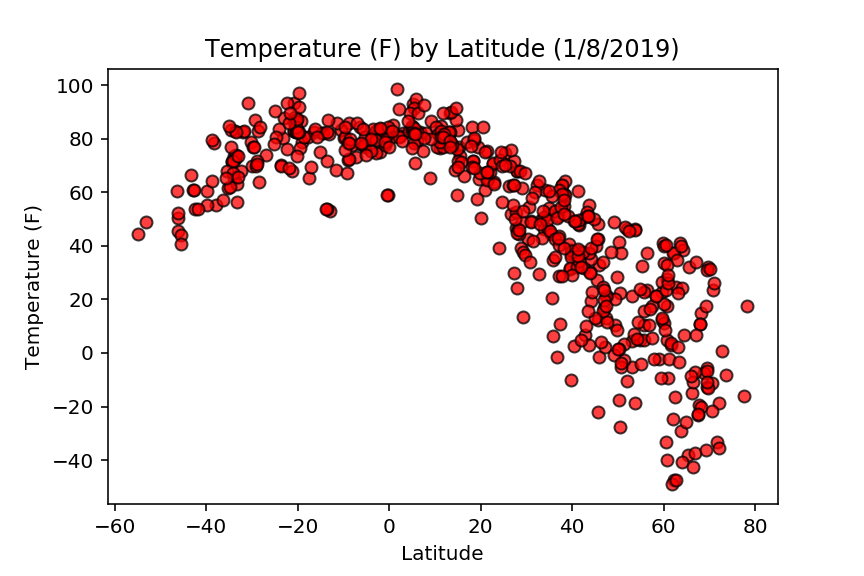

In [209]:
%matplotlib notebook

plt.scatter(lat, temp, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title('Temperature (F) by Latitude (1/8/2019)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('saves/temp_lat.png')


<IPython.core.display.Javascript object>


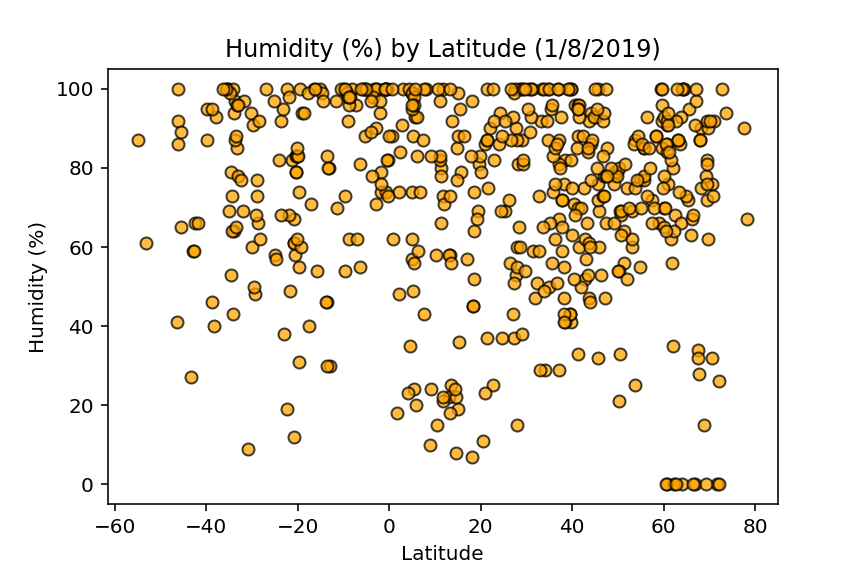

In [208]:
%matplotlib notebook

plt.scatter(lat, humidity, marker="o", facecolors="orange", edgecolors="black", alpha=0.75)
plt.title('Humidity (%) by Latitude (1/8/2019)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('saves/humidity_lat.png')

<IPython.core.display.Javascript object>


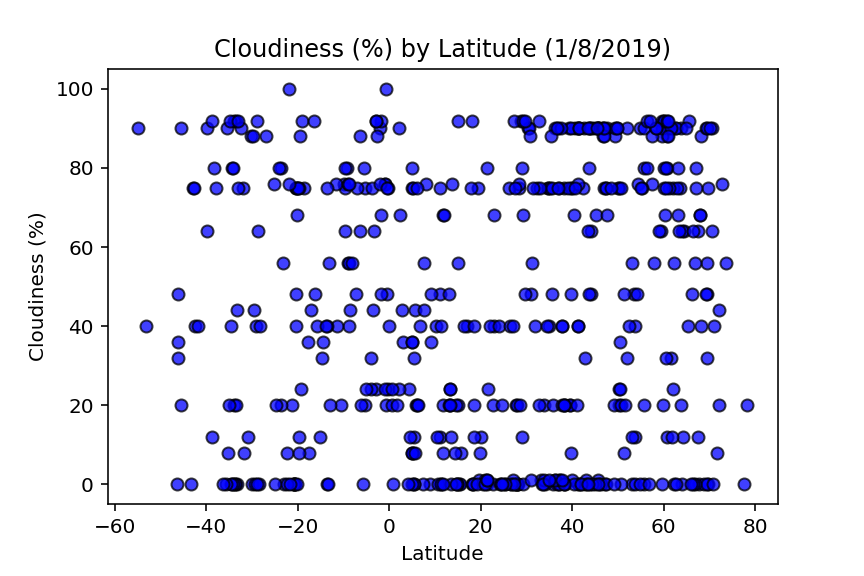

In [207]:
%matplotlib notebook

plt.scatter(lat, cloudiness, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title('Cloudiness (%) by Latitude (1/8/2019)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('saves/cloudiness_lat.png')

<IPython.core.display.Javascript object>


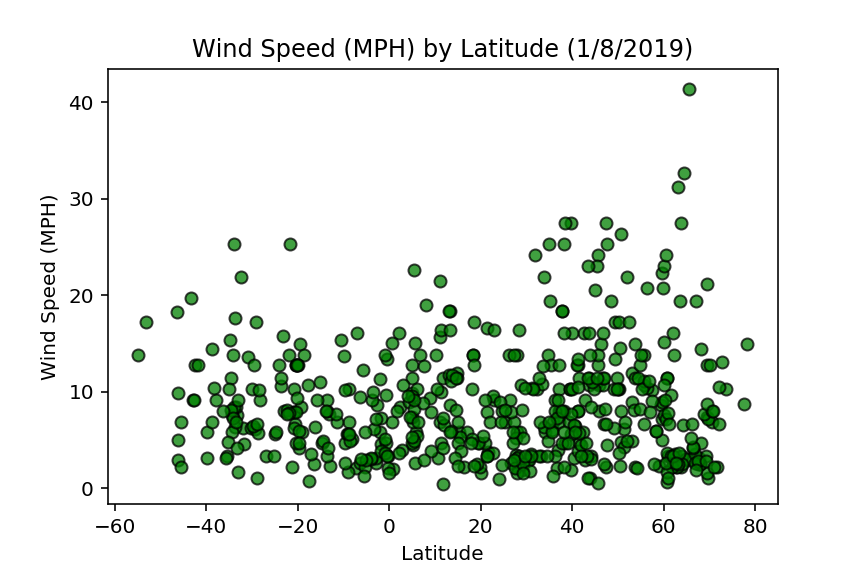

In [205]:
%matplotlib notebook

plt.scatter(lat, wind_speed, marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.title('Wind Speed (MPH) by Latitude (1/8/2019)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.savefig('saves/wind_speed_lat.png')

In [ ]:
# Three Observable Trends:
    
#     1. The temperature is warmest near the equator, but is also warm in the southern hemisphere,
#         and progressivley colder the farther north we look. It is currently winter in the 
#         northern hemisphere and summer in the southern.
    
#     2. Cloudiness and humidity do not seem to be correlated with their latitude.
    
#     3. Wind speed tends to be higher the farther away from the equator that we look.